## Libraries + load data

github repo: https://github.com/YongyangFu/IS-467-group-23-final-project.git

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv_path = "HR_Analytics.csv"       # change if needed
out_dir  = "mnt/data/hr_eda_figures"
os.makedirs(out_dir, exist_ok=True)

df = pd.read_csv(csv_path)
saved = []

# ================================================================
# Utility functions
# ================================================================
def save_and_show(filename: str, figsize=(8,5), dpi=150, tight=True):
    """Apply common sizing, save to disk, and display inline."""
    fig = plt.gcf()
    fig.set_size_inches(figsize[0], figsize[1])
    if tight:
        plt.tight_layout()
    path = os.path.join(out_dir, filename)
    plt.savefig(path, dpi=dpi, bbox_inches="tight")
    saved.append(path)
    plt.show()
    plt.close()

def rate_by_group(frame: pd.DataFrame, group_col: str, outcome_col: str, positive_label) -> pd.Series:
    """Compute P(outcome == positive_label | group)."""
    return frame.groupby(group_col)[outcome_col].apply(lambda s: np.mean((s == positive_label).astype(float)))

## Exploratory Visualizations

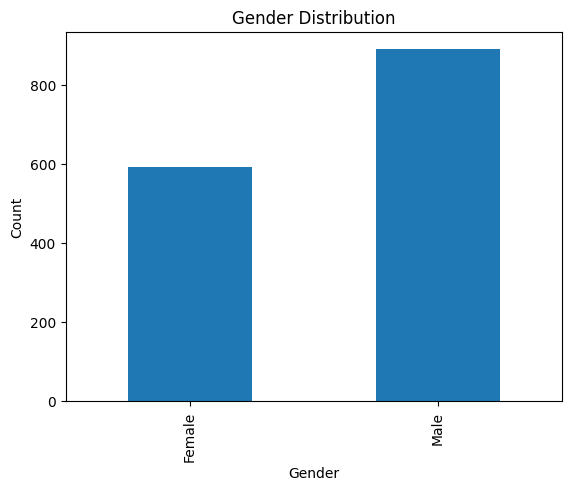

In [4]:
# 1. Gender Distribution
if "Gender" in df.columns:
    plt.figure()
    df["Gender"].value_counts(dropna=False).sort_index().plot(kind="bar")
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    # save_and_show("01_gender_distribution.png", figsize=(7,4))

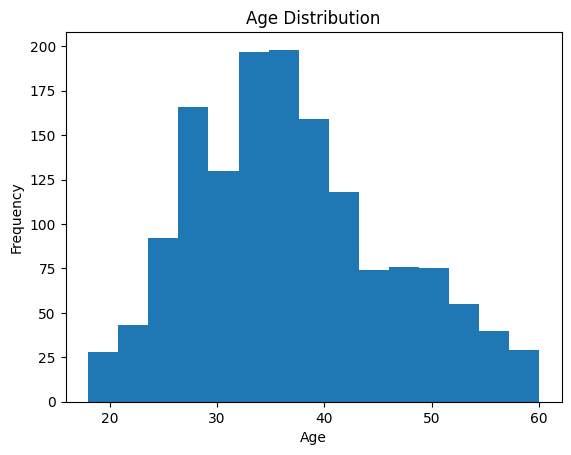

In [5]:
# 2. Age Histogram

if "Age" in df.columns:
    plt.figure()
    plt.hist(df["Age"].dropna(), bins=15)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    # save_and_show("02_age_histogram.png", figsize=(7,4))

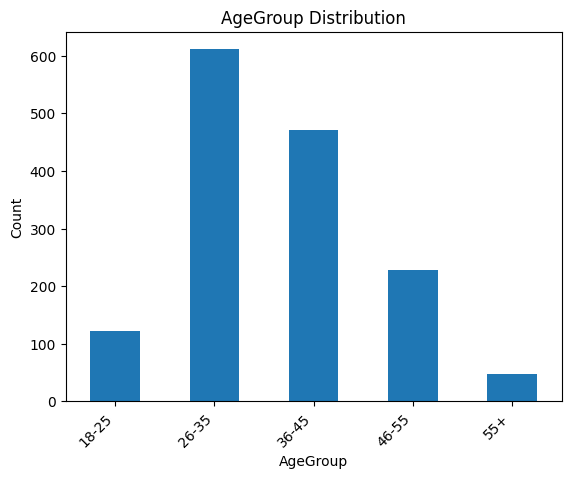

In [6]:
# 3. AgeGroup Distribution
if "AgeGroup" in df.columns:
    plt.figure()
    df["AgeGroup"].value_counts().sort_index().plot(kind="bar")
    plt.title("AgeGroup Distribution")
    plt.xlabel("AgeGroup")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    # save_and_show("03_agegroup_distribution.png", figsize=(8,4.5))

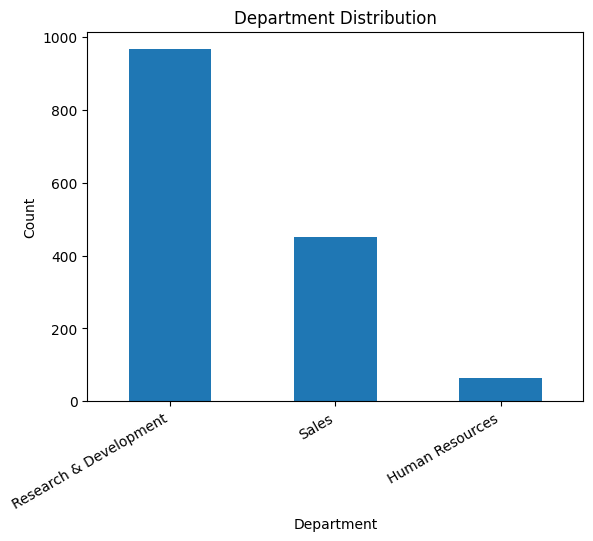

In [7]:
# 4. Department Distribution
if "Department" in df.columns:
    plt.figure()
    df["Department"].value_counts().sort_values(ascending=False).plot(kind="bar")
    plt.title("Department Distribution")
    plt.xlabel("Department")
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    # save_and_show("04_department_distribution.png", figsize=(8,4.5))

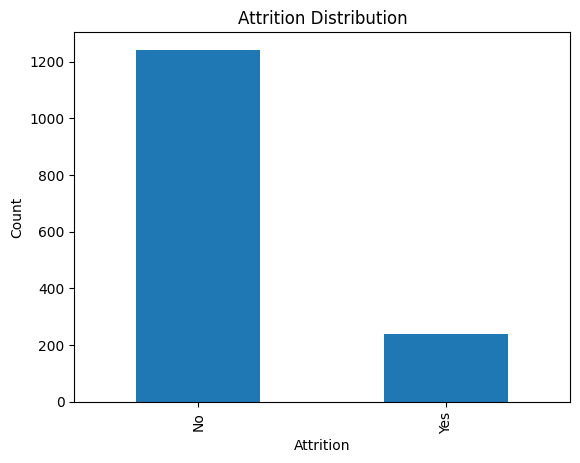

In [8]:
# 5. Attrition Distribution
if "Attrition" in df.columns:
    plt.figure()
    df["Attrition"].value_counts().sort_index().plot(kind="bar")
    plt.title("Attrition Distribution")
    plt.xlabel("Attrition")
    plt.ylabel("Count")
    # save_and_show("05_attrition_distribution.png", figsize=(6.5,4))

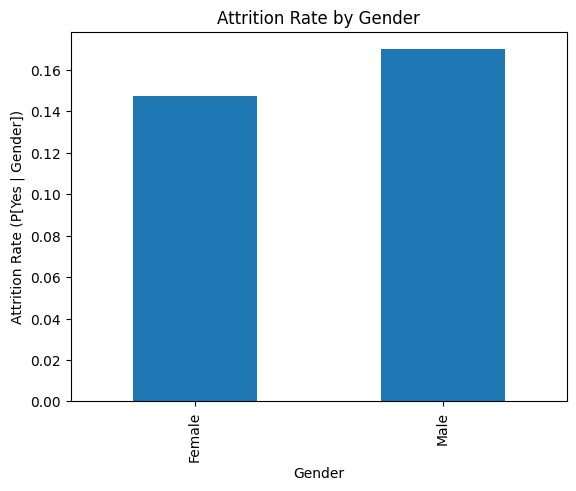

In [9]:
# 6. Attrition Rate by Gender
if set(["Attrition","Gender"]).issubset(df.columns):
    plt.figure()
    rate = rate_by_group(df, "Gender", "Attrition", "Yes")
    rate.loc[rate.index].plot(kind="bar")
    plt.title("Attrition Rate by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Attrition Rate (P[Yes | Gender])")
    # save_and_show("06_attrition_rate_by_gender.png", figsize=(7,4))

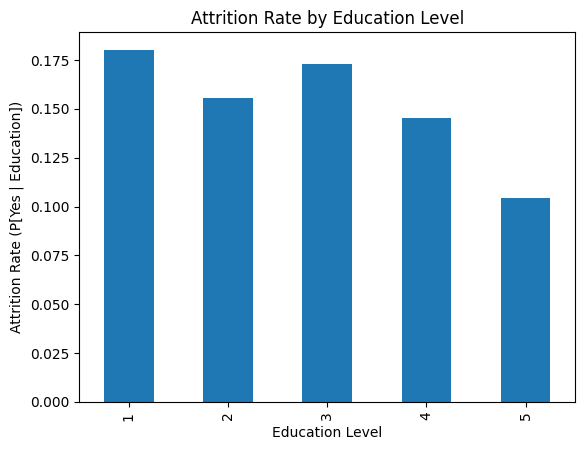

In [10]:
# 7. Attrition Rate by Education
if set(["Attrition","Education"]).issubset(df.columns):
    plt.figure()
    rate = rate_by_group(df, "Education", "Attrition", "Yes").sort_index()
    rate.plot(kind="bar")
    plt.title("Attrition Rate by Education Level")
    plt.xlabel("Education Level")
    plt.ylabel("Attrition Rate (P[Yes | Education])")
    # save_and_show("07_attrition_rate_by_education.png", figsize=(8,4.5))

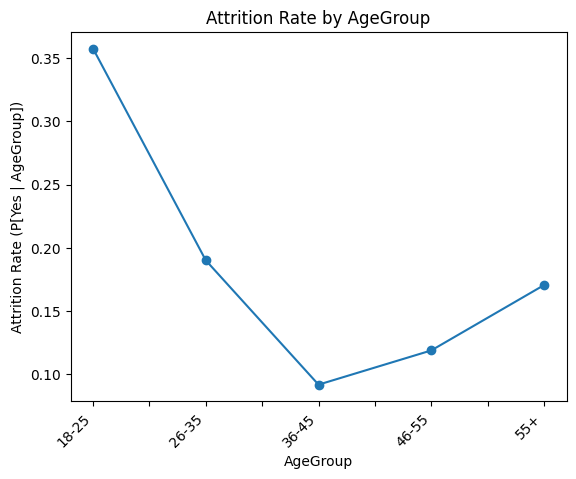

In [11]:
# 8. Attrition Rate by AgeGroup or binned Age
if "Attrition" in df.columns:
    if "AgeGroup" in df.columns:
        plt.figure()
        order = sorted(df["AgeGroup"].dropna().unique())
        rates = rate_by_group(df, "AgeGroup", "Attrition", "Yes").reindex(order)
        rates.plot(kind="line", marker="o")
        plt.title("Attrition Rate by AgeGroup")
        plt.xlabel("AgeGroup")
        plt.ylabel("Attrition Rate (P[Yes | AgeGroup])")
        plt.xticks(rotation=45, ha="right")
        # save_and_show("08_attrition_rate_by_agegroup.png", figsize=(9,4.5))
    elif "Age" in df.columns:
        bins = [18,25,30,35,40,45,50,60]
        labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
        tmp = df.copy()
        tmp["AgeBin"] = pd.cut(tmp["Age"], bins=bins, labels=labels, include_lowest=True)
        plt.figure()
        rates = rate_by_group(tmp, "AgeBin", "Attrition", "Yes").dropna()
        order = [lab for lab in labels if lab in rates.index]
        rates.loc[order].plot(kind="line", marker="o")
        plt.title("Attrition Rate by Age (Binned)")
        plt.xlabel("Age Bin")
        plt.ylabel("Attrition Rate (P[Yes | Age])")
        plt.xticks(rotation=0)
        # save_and_show("08_attrition_rate_by_age_bin.png", figsize=(9,4.5))

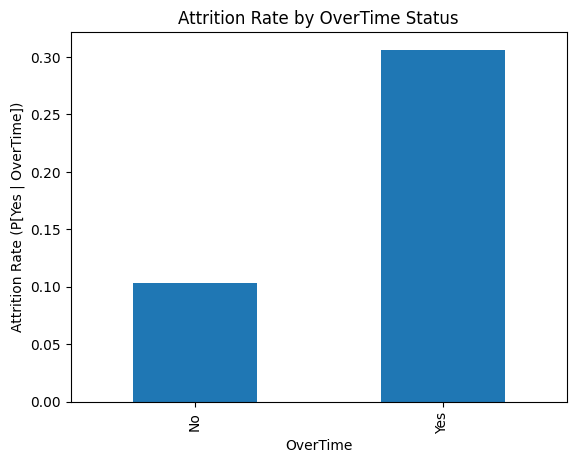

In [12]:
# 9. Attrition Rate by OverTime
if set(["Attrition","OverTime"]).issubset(df.columns):
    plt.figure()
    rate = rate_by_group(df, "OverTime", "Attrition", "Yes")
    rate.loc[rate.index].plot(kind="bar")
    plt.title("Attrition Rate by OverTime Status")
    plt.xlabel("OverTime")
    plt.ylabel("Attrition Rate (P[Yes | OverTime])")
    # save_and_show("09_attrition_rate_by_overtime.png", figsize=(6.5,4))

In [13]:
# # 10. WorkLifeBalance by Attrition (Boxplot)

# if set(["WorkLifeBalance","Attrition"]).issubset(df.columns):
#     plt.figure()
#     groups, labels = [], []
#     for val in df["Attrition"].dropna().unique():
#         groups.append(df.loc[df["Attrition"] == val, "WorkLifeBalance"].dropna().values)
#         labels.append(f"Attrition={val}")
#     plt.boxplot(groups, labels=labels, showfliers=False)
#     plt.title("WorkLifeBalance by Attrition")
#     plt.xlabel("Attrition Group")
#     plt.ylabel("WorkLifeBalance (1–4)")
#     save_and_show("10_worklifebalance_by_attrition_boxplot.png", figsize=(6.5,4))

C:\Users\Andre\AppData\Local\Temp\ipykernel_31160\1917778188.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


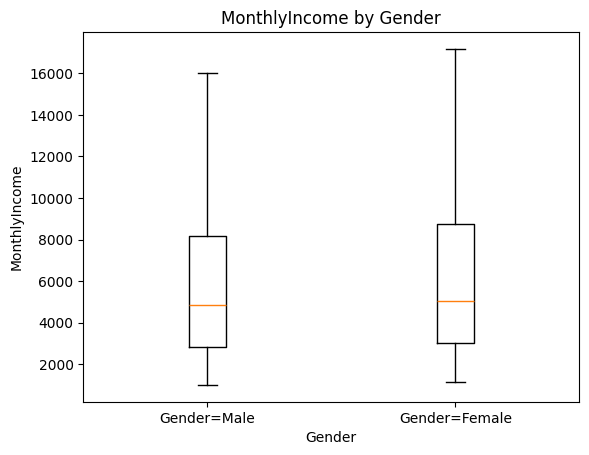

In [14]:
# 11. MonthlyIncome by Gender (Boxplot)
# ================================================================
if set(["MonthlyIncome","Gender"]).issubset(df.columns):
    plt.figure()
    groups, labels = [], []
    for val in df["Gender"].dropna().unique():
        groups.append(df.loc[df["Gender"] == val, "MonthlyIncome"].dropna().values)
        labels.append(f"Gender={val}")
    plt.boxplot(groups, labels=labels, showfliers=False)
    plt.title("MonthlyIncome by Gender")
    plt.xlabel("Gender")
    plt.ylabel("MonthlyIncome")
    # save_and_show("11_monthlyincome_by_gender_boxplot.png", figsize=(7,4.5))


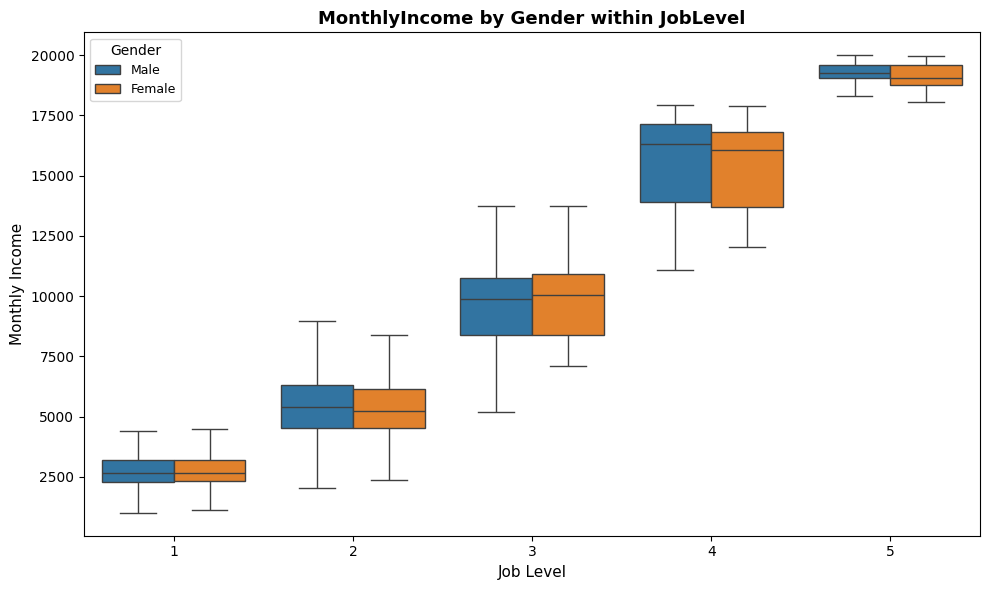

In [15]:
# 12. MonthlyIncome by Gender within JobLevel (Grouped Boxplot)

if set(["MonthlyIncome","Gender","JobLevel"]).issubset(df.columns):
    plt.figure(figsize=(10,6))
    sns.boxplot(
        data=df,
        x="JobLevel",
        y="MonthlyIncome",
        hue="Gender",
        showfliers=False
    )
    plt.title("MonthlyIncome by Gender within JobLevel", fontsize=13, weight='bold')
    plt.xlabel("Job Level", fontsize=11)
    plt.ylabel("Monthly Income", fontsize=11)
    plt.legend(title="Gender", fontsize=9, title_fontsize=10, loc="upper left")
    plt.tight_layout()
    # plt.savefig(os.path.join(out_dir, "12_monthlyincome_by_gender_joblevel_seaborn.png"), dpi=200)
    plt.show()

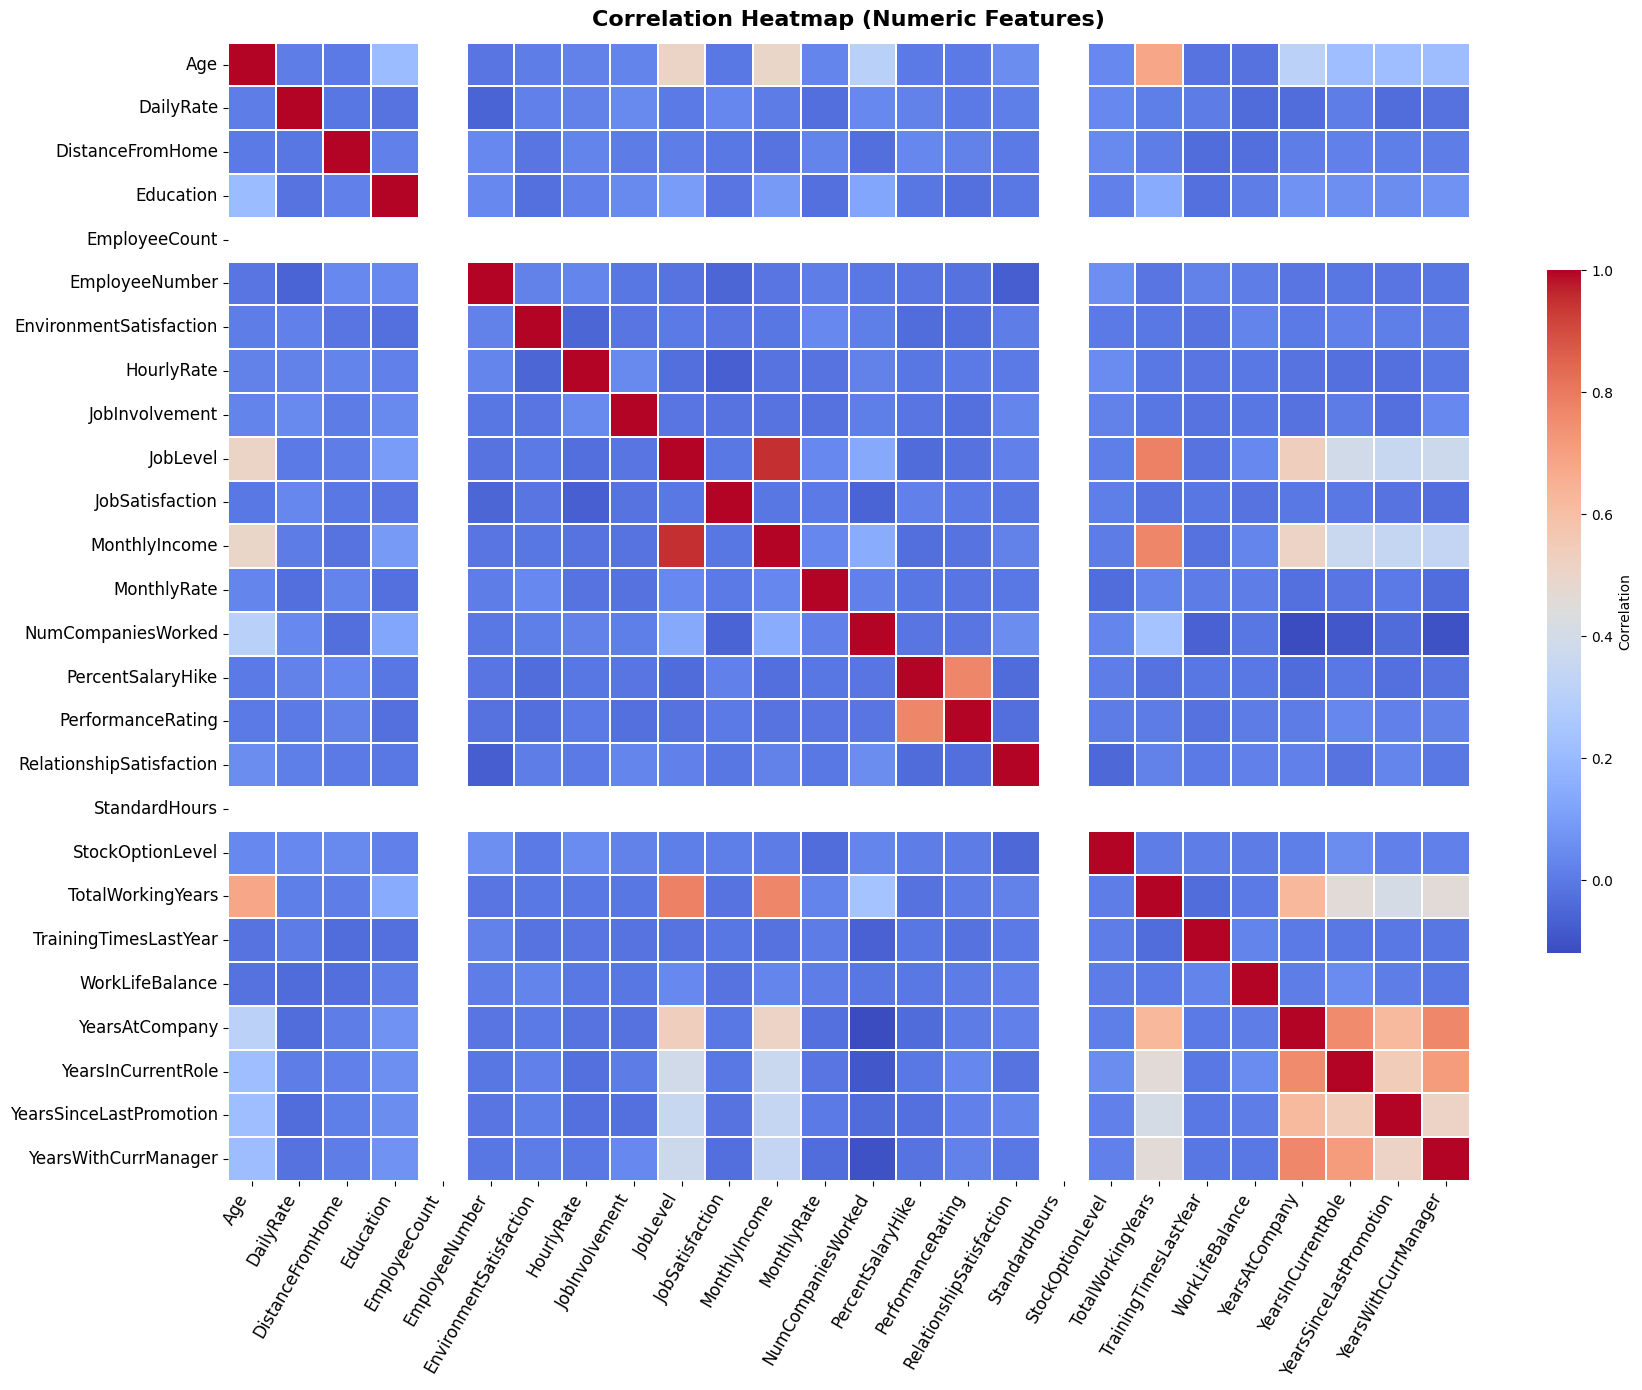

In [16]:
# 13. Correlation Heatmap (larger, high DPI, smaller tick labels)
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(18,14))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,
    cbar_kws={"shrink": 0.6, "label": "Correlation"},
    linewidths=0.2
)
plt.title("Correlation Heatmap (Numeric Features)", fontsize=16, weight="bold", pad=12)
plt.xticks(fontsize=12, rotation=60, ha="right")
plt.yticks(fontsize=12)
plt.tight_layout()
# plt.savefig(os.path.join(out_dir, "13_correlation_heatmap_seaborn.png"), dpi=250)
plt.show()

In [17]:
# # 14. Continuous Feature Boxplots
# cont_feats = [c for c in ["DailyRate","MonthlyRate","DistanceFromHome"] if c in df.columns]
# if cont_feats:
#     plt.figure()
#     groups = [df[c].dropna().values for c in cont_feats]
#     plt.boxplot(groups, showfliers=False)
#     plt.title("Continuous Feature Distributions")
#     plt.xlabel("Feature")
#     plt.ylabel("Value")
#     plt.xticks(range(1, len(cont_feats)+1), cont_feats)
#     save_and_show("14_continuous_features_boxplots.png", figsize=(7.5,4.5))

In [18]:
for p in saved:
    print(p)

## Scoring model

### Rubric dataframe + Scoring

In [38]:
# Some additional Quantitative context to support rubric scoring

print("Shape:", df.shape)
print("Columns:", len(df.columns))
print("\nMissing values per column (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))

# Check duplicates on EmpID (employee-level uniqueness)
n_unique_empid = df["EmpID"].nunique()
n_rows = len(df)
print(f"\nNumber of rows: {n_rows}")
print(f"Number of unique EmpID: {n_unique_empid}")
print(f"Number of duplicated EmpID rows: {n_rows - n_unique_empid}")

dup_empid = df[df.duplicated("EmpID", keep=False)].sort_values("EmpID")
if not dup_empid.empty:
    print("\nExample duplicated EmpID records:")
    display(dup_empid.head())

# Basic group distributions relevant for fairness / equity context
print("\nAttrition distribution:")
display(df["Attrition"].value_counts(dropna=False).to_frame("count")
        .assign(prop=lambda x: x["count"] / len(df)))

print("\nGender distribution:")
display(df["Gender"].value_counts(dropna=False).to_frame("count")
        .assign(prop=lambda x: x["count"] / len(df)))

print("\nDepartment distribution:")
display(df["Department"].value_counts(dropna=False).to_frame("count")
        .assign(prop=lambda x: x["count"] / len(df)))

if "AgeGroup" in df.columns:
    print("\nAgeGroup distribution:")
    display(df["AgeGroup"].value_counts(dropna=False).sort_index()
            .to_frame("count")
            .assign(prop=lambda x: x["count"] / len(df)))

# Numeric summary to check for obvious anomalies
numeric_df = df.select_dtypes(include=[np.number])
print("\nBasic numeric summary (first few columns):")
display(numeric_df.describe().T.head(10))

print("\nUnique values for some structural fields:")
for col in ["StandardHours", "Over18"]:
    if col in df.columns:
        print(f"{col}: unique values ->", df[col].unique())


Shape: (1480, 38)
Columns: 38

Missing values per column (top 10):
YearsWithCurrManager    57
EmpID                    0
AgeGroup                 0
Attrition                0
BusinessTravel           0
Age                      0
DailyRate                0
Department               0
Education                0
DistanceFromHome         0
dtype: int64

Number of rows: 1480
Number of unique EmpID: 1470
Number of duplicated EmpID rows: 10

Example duplicated EmpID records:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
327,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,...,2,80,0,5,3,1,5,4,0,4.0
328,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,...,2,80,0,5,3,1,5,4,0,4.0
1336,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,...,2,80,1,20,3,3,3,2,2,0.0
1335,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,...,2,80,1,20,3,3,3,2,2,0.0
954,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,...,1,80,1,21,2,2,20,9,9,6.0



Attrition distribution:


,count,prop
Attrition,,
No,1242,0.839189
Yes,238,0.160811



Gender distribution:


,count,prop
Gender,,
Male,889,0.600676
Female,591,0.399324



Department distribution:


,count,prop
Department,,
Research & Development,967,0.653378
Sales,450,0.304054
Human Resources,63,0.042568



AgeGroup distribution:


,count,prop
AgeGroup,,
18-25,123,0.083108
26-35,611,0.412838
36-45,471,0.318243
46-55,228,0.154054
55+,47,0.031757



Basic numeric summary (first few columns):


,count,mean,std,min,25%,50%,75%,max
Age,1480.0,36.917568,9.128559,18.0,30.00,36.0,43.00,60.0
DailyRate,1480.0,801.384459,403.126988,102.0,465.00,800.0,1157.00,1499.0
DistanceFromHome,1480.0,9.220270,8.131201,1.0,2.00,7.0,14.00,29.0
Education,1480.0,2.910811,1.023796,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1480.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1480.0,1031.860811,605.955046,1.0,493.75,1027.5,1568.25,2068.0
EnvironmentSatisfaction,1480.0,2.724324,1.092579,1.0,2.00,3.0,4.00,4.0
HourlyRate,1480.0,65.845270,20.328266,30.0,48.00,66.0,83.00,100.0
JobInvolvement,1480.0,2.729730,0.713007,1.0,2.00,3.0,3.00,4.0
JobLevel,1480.0,2.064865,1.105574,1.0,1.00,2.0,3.00,5.0



Unique values for some structural fields:
StandardHours: unique values -> [80]
Over18: unique values -> ['Y']


In [33]:
rubric_out_dir = "Rubric Scoring Results/data/hr_fairness_rubric"
os.makedirs(rubric_out_dir, exist_ok=True)

#List out section 

section_scores = {
    "B111": {
        "area_name": "Equity, Data",
        "criterion_names": [
            "Data Source Documentation",
            "Purpose Disclosure",
            "Metadata Availability",
            "Sampling Visibility",
            "Error and Limitation Reporting",
        ],
        "item_scores": [0, 1, 1, -1, -1],
    },
    "B112": {
        "area_name": "Bias Detection, Data",
        "criterion_names": [
            "Representation Balance",
            "Feature Bias Screening",
            "Outcome Disparity Checks",
            "Missing Data Pattern Analysis",
            "Bias Flag Reporting",
        ],
        "item_scores": [0, -1, 0, 0, -1],
    },
    "B113": {
        "area_name": "Sampling Integrity, Data",
        "criterion_names": [
            "Sampling Frame Clarity",
            "Inclusion and Exclusion Rules",
            "Coverage of Key Subgroups",
            "Sampling Method Transparency",
            "Oversampling/Correction Strategy",
        ],
        "item_scores": [-1, -1, 0, -1, -1],
    },
    "B114": {
        "area_name": "Fairness Metrics, Data",
        "criterion_names": [
            "Defined Fairness Metrics",
            "Metric Justification",
            "Group Comparison Reporting",
            "Threshold and Cutoff Transparency",
            "Metric Limitations Disclosure",
        ],
        "item_scores": [-1, -1, -1, -1, -1],
    },
    "B211": {
        "area_name": "Fairness, Data",
        "criterion_names": [
            "Detection of Demographic Imbalance",
            "Identification of Historical or Structural Bias",
            "Sensitive Attribute Handling and Documentation",
            "Bias Detection Techniques and Evidence",
            "Correctness and Integrity of Labels",
            "Sampling and Collection Process Transparency",
            "Mitigation Readiness and Recommendations",
        ],
        "item_scores": [-1, -1, -1, -1, 0, -1, -1],
    },
    "B212": {
        "area_name": "Impact Assessment, Data",
        "criterion_names": [
            "Identification of Affected Demographic Groups",
            "Analysis of Differential Impact",
            "Evaluation of Data Processing Risks",
            "Assessment of Missingness and Exclusion Impact",
            "Scenario-Based Impact Projections",
            "Documentation of Assumptions and Limitations",
            "Mitigation Strategies for Disparate Impact",
        ],
        "item_scores": [-1, -1, 0, 0, -1, 0, -1],
    },
    "B311": {
        "area_name": "Bias Mitigation, Data",
        "criterion_names": [
            "Selection and Justification of Mitigation Technique",
            "Implementation Transparency",
            "Effectiveness Evaluation Across Groups",
            "Impact on Data Integrity and Utility",
            "Handling of Rare or Underrepresented Groups",
            "Assessment of New Risks Introduced by Mitigation",
            "Mitigation Outcome Reporting and Recommendations",
        ],
        "item_scores": [-1, -1, -1, 0, -1, -1, -1],
    },
    "B312": {
        "area_name": "Rebalancing Techniques (Data)",
        "criterion_names": [
            "Representation Adjustment",
            "Transparency of Rebalancing Process",
            "Evaluation of Effectiveness",
            "Impact on Data Integrity",
            "Consideration of Rare Groups",
        ],
        "item_scores": [-1, -1, -1, -1, -1],
    },
    "B411": {
        "area_name": "Third-Party Assessment, Data",
        "criterion_names": [
            "Independent Audit",
            "Documentation of Findings",
            "Recommendations for Improvement",
            "Verification of Bias Mitigation",
            # TODO: Replace this placeholder with the exact 5th criterion
            # name if your final rubric truly has 5 items for B411.
            "Additional Third-Party Assessment Criterion (see rubric)",
        ],
        "item_scores": [-1, -1, -1, -1, -1],
    },
    "B412": {
        "area_name": "Transparency Reports, Data",
        "criterion_names": [
            "Reporting of Preprocessing Steps",
            "Disclosure of Fairness Practices",
            "Accessibility and Clarity",
            "Documentation of Limitations",
            "Public or Stakeholder Availability",
        ],
        "item_scores": [0, 0, 0, 0, 0],
    },
}


In [34]:
# Rubric dataframe
rubric_rows = []
for code, info in section_scores.items():
    area_name = info["area_name"]
    names = info["criterion_names"]
    scores = info["item_scores"]

    if len(names) != len(scores):
        raise ValueError(f"Length mismatch for {code}: "
                         f"{len(names)} names vs {len(scores)} scores")

    for idx, (crit_name, score) in enumerate(zip(names, scores), start=1):
        rubric_rows.append(
            {
                "system_card_code": code,       # e.g. B111
                "evaluation_area": area_name,   # e.g. Equity, Data
                "item_id": f"{code}_item{idx}", # e.g. B111_item1
                "criterion_name": crit_name,    # exact Evaluation Criterion name
                "score": score,                 # -1, 0, or 1
            }
        )

rubric_df = pd.DataFrame(rubric_rows)

print("Full detailed rubric with criterion names and scores:")
display(rubric_df.sort_values(["system_card_code", "item_id"]))

Full detailed rubric with criterion names and scores:


,system_card_code,evaluation_area,item_id,criterion_name,score
0,B111,"Equity, Data",B111_item1,Data Source Documentation,0
1,B111,"Equity, Data",B111_item2,Purpose Disclosure,1
2,B111,"Equity, Data",B111_item3,Metadata Availability,1
3,B111,"Equity, Data",B111_item4,Sampling Visibility,-1
4,B111,"Equity, Data",B111_item5,Error and Limitation Reporting,-1
5,B112,"Bias Detection, Data",B112_item1,Representation Balance,0
6,B112,"Bias Detection, Data",B112_item2,Feature Bias Screening,-1
7,B112,"Bias Detection, Data",B112_item3,Outcome Disparity Checks,0
8,B112,"Bias Detection, Data",B112_item4,Missing Data Pattern Analysis,0
9,B112,"Bias Detection, Data",B112_item5,Bias Flag Reporting,-1


In [31]:
summary_df = (
    rubric_df
    .groupby(["system_card_code", "evaluation_area"], as_index=False)
    .agg(
        n_items=("score", "count"),
        section_score_sum=("score", "sum"),
        mean_score=("score", "mean"),
    )
)

# Rescale mean score from [-1, 1] to [0, 100] for an index
summary_df["fairness_index_0_100"] = (summary_df["mean_score"] + 1) / 2 * 100

print("\nSection-level Fairness–Data scores (B111–B412):")
display(summary_df.sort_values("system_card_code"))

# Overall average score across all items
overall_mean = rubric_df["score"].mean()
overall_index_0_100 = (overall_mean + 1) / 2 * 100

print(f"\nOverall Fairness–Data score (mean of all rubric items): {overall_mean:.3f}")
print(f"Overall Fairness–Data index (0–100): {overall_index_0_100:.1f}")


Section-level Fairness–Data scores (B111–B412):


,system_card_code,evaluation_area,n_items,section_score_sum,mean_score,fairness_index_0_100
0,B111,"Equity, Data",5,0,0.000000,50.000000
1,B112,"Bias Detection, Data",5,-2,-0.400000,30.000000
2,B113,"Sampling Integrity, Data",5,-4,-0.800000,10.000000
3,B114,"Fairness Metrics, Data",5,-5,-1.000000,0.000000
4,B211,"Fairness, Data",7,-6,-0.857143,7.142857
5,B212,"Impact Assessment, Data",7,-4,-0.571429,21.428571
6,B311,"Bias Mitigation, Data",7,-6,-0.857143,7.142857
7,B312,Rebalancing Techniques (Data),5,-5,-1.000000,0.000000
8,B411,"Third-Party Assessment, Data",5,-5,-1.000000,0.000000
9,B412,"Transparency Reports, Data",5,0,0.000000,50.000000



Overall Fairness–Data score (mean of all rubric items): -0.661
Overall Fairness–Data index (0–100): 17.0


In [36]:
# 5. Save detailed and summary tables
# ----------------------------------------------------------------
rubric_detail_path = os.path.join(
    rubric_out_dir, "fairness_data_rubric_scored_B111_B412.csv"
)
rubric_summary_path = os.path.join(
    rubric_out_dir, "fairness_data_rubric_summary_B111_B412.csv"
)

rubric_df.to_csv(rubric_detail_path, index=False)
summary_df.to_csv(rubric_summary_path, index=False)

print("\nSaved CSVs:")
print(" -", rubric_detail_path)
print(" -", rubric_summary_path)


Saved CSVs:
 - Rubric Scoring Results/data/hr_fairness_rubric\fairness_data_rubric_scored_B111_B412.csv
 - Rubric Scoring Results/data/hr_fairness_rubric\fairness_data_rubric_summary_B111_B412.csv
